


















2.0000000000000027


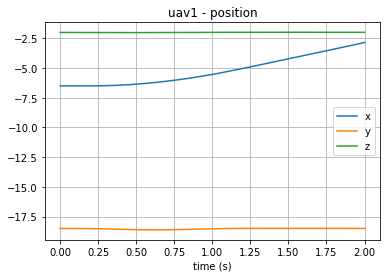

In [2]:
#!/usr/bin/env python
# coding: utf-8
%matplotlib inline
%reload_ext autoreload
%autoreload 2
import sys
import numpy as np
from IPython.display import HTML, display

sys.path.insert(0, '../')
from flightgoggles.env import *

if __name__ == "__main__":
    env = flightgoggles_env(
        cfg_dir="../config",
        cfg_fgclient="FlightGogglesClient_demo_uav.yaml",
        cfg_uav="multicopterDynamicsSim.yaml")

    env.set_state_vehicle(vehicle_id="uav1", attitude_euler_angle=np.array([0.,0.,-np.pi/2]))
    current_pos = env.get_state("uav1")["position"]
    current_att = env.get_state("uav1")["attitude_euler_angle"]
    target_pose = np.zeros(4)
    target_pose[:3] = current_pos + np.array([9.0,0.0,0.0])
    target_pose[3] = current_att[2] + np.pi/2
    
    for j in range(200):
        env.proceed_waypoint(vehicle_id="uav1", waypoint_command=target_pose, duration=0.01)
    env.plot_state(vehicle_id="uav1", attribute="position")
    env.save_logs(vehicle_id="uav1", save_dir="data/")
    
    img = env.get_camera_image(camera_id="cam1")
    print(img[-1]["timestamp"])

    ani_set = env.plot_state_video(flag_save=False, filename="uav", dpi=400)
    if "cam1" in ani_set.keys():
        display(HTML(ani_set["cam1"].to_html5_video()))
    env.close()